<a href="https://colab.research.google.com/github/SifolDifol/HomeWorkForCourse/blob/pandas-%2F-numpy/%D0%90%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%E2%84%962_%D0%93%D0%B0%D0%B2%D1%80%D0%B8%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Промежуточная аттестация
**Вопросы:**
1. Объясните, как вычисляется качество модели с задачей классификации: назовите основные и вторичные метрики, приведите пример.
2. Что такое тестовый набор данных (test set) и для чего он нужен?
3. В чем разница между параметром модели и гиперпараметром алгоритма обучения?
Приведите примеры.

**Соревнованиенакагле** - https://www.kaggle.com/competitions/titanic/
Соревнование простое: используйте машинное обучение для создания модели, которая предсказывает, кто из пассажиров выжил после кораблекрушения "Титаника".

Примерный план:
1. Знакомствосданными
2. EDA3. Отборпризнаков
4. Моделирование
5. Предсказание + итоги

---

Ответы на вопросы:
1. К основными метриками вычесления качества модели относятся;
*   Accuracy (достоверность/аккуратность) — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):Интерпретация: как много (в долях) модель угадала ответов.
Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала».
Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы. Продемонстрируем это следующим примером.

*   Precision (точность), или PPV (Positive Predictive Value) — это доля объектов, названных классификатором положительными и при этом действительно являющихся таковыми, по отношению ко всем названным положительными объектам.
Метрика также изменяется от 0 до 1.
Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. То есть чем ближе precision к 1, тем меньше вероятность модели допустить ошибку I рода.
Именно precision не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение False Positive и метрика снижается.
Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть precision.

*   Recall (полнота), или TPR (True Positive Rate) — это доля объектов, названных классификатором положительными и при этом действительно являющихся таковыми, по отношению ко всем объектам положительного класса.
Recall = TP / (TP + FN)
Метрика изменяется от 0 до 1.
Интерпретация: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что метрика зависит от количества ложноотрицательных срабатываний. То есть чем ближе recall к 1, тем меньше вероятность модели допустить ошибку II рода.
Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

*   Fb(F-мера) — это взвешенное среднее гармоническое между precision и recall:где b — это вес precision в метрике: чем больше , тем больше вклад.
В частном случае, когда b=1 , мы получаем равный вклад для precision и recall, а формула будет выражать простое среднее гармоническое, или метрику F1(F1-мера:
Метрика равна своему максимуму (1), если и precision, и recall равны 1 (то есть когда отсутствуют как ложноположительные, так и ложноотрицательные срабатывания). Но если хотя бы одна из метрик будет близка к 0, то F1 и будет близка к 0.
Несмотря на отсутствие бизнес-интерпретации, метрика F1 является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между precision и recall.

К вторичными признаками относятся;
*   Матрица ошибок - показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Пример

Допустим модель классифицирует письма как "спам" или "не спам". Если модель предсказала 90 из 100 писем правильно, то точность будет 90%. Если из 50 писем, которые были спамом, модель правильно предсказала 45, то полнота будет 90%. Если из 50 писем, которые модель предсказала как спам, 45 были спамом, то точность будет 90%. F1-мера также будет 90%, так как точность и полнота равны.

2. Тестовая (контрольная) — набор данных, который имитирует работу модели в реальных условиях после подбора всех параметров. С помощью этого набора осуществляется окончательная проверка качества. Главное условие для тестовой выборки — она должна быть независимой от обучающей

3. Параметр модели это признаки которые возможно использовать для обучения модели, для каждой модели обучения характер отбора данных параметров может отличаться а гиперпараметры это внешние параметроы модели, например коэффициентов регуляризации, максимальной глубины дерева, количества деревьев в случайном лесу и т. д.




In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики


from sklearn.datasets import load_diabetes
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier


from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn import preprocessing

import plotly
import plotly.express as px

import warnings # для игнорирования предупреждений
#Игнорируем варнинги
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
traindf = pd.read_csv('drive/MyDrive/Colab Notebooks/dataForWork/train.csv')
testdf = pd.read_csv('drive/MyDrive/Colab Notebooks/dataForWork/test.csv')
gender_submissiondf = pd.read_csv('drive/MyDrive/Colab Notebooks/dataForWork/gender_submission.csv')

 # Variable Notes


---

**pclass:**

A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower


---

**age:**

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

---

**sibsp:**

The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

---
**parch:**

The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

Обзор данных

In [3]:
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
testdf.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
gender_submissiondf.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [6]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
testdf.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
gender_submissiondf.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [9]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
gender_submissiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [12]:
traindf.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
testdf.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


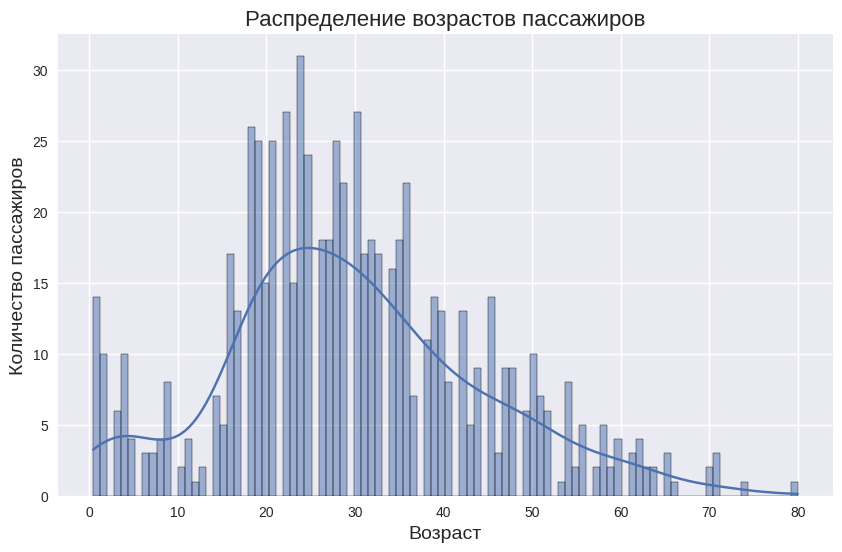

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(traindf['Age'], bins=100, kde=True)

plt.title('Распределение возрастов пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество пассажиров', fontsize=14)

plt.show()

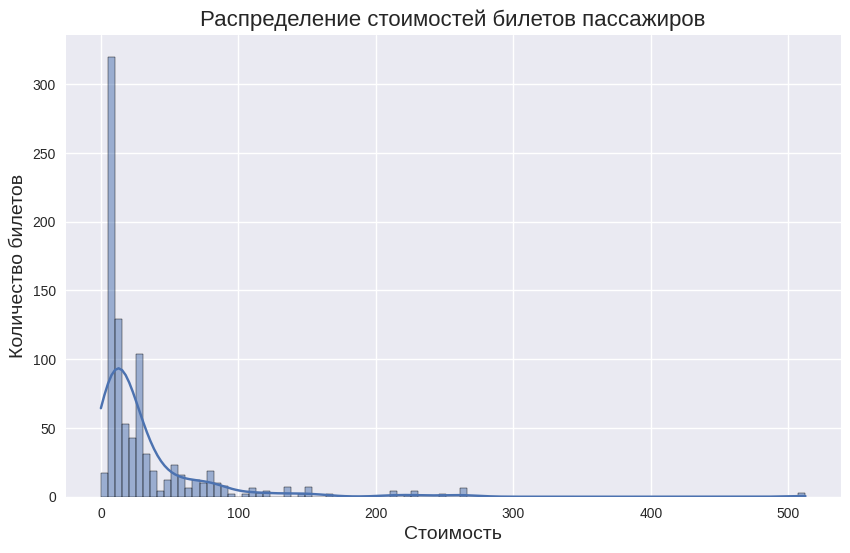

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(traindf['Fare'], bins=100, kde=True)

plt.title('Распределение стоимостей билетов пассажиров', fontsize=16)
plt.xlabel('Стоимость', fontsize=14)
plt.ylabel('Количество билетов', fontsize=14)

plt.show()

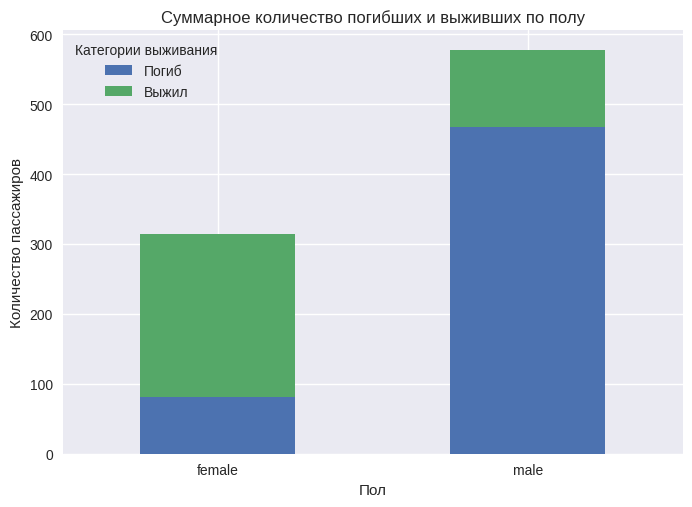

In [16]:
summary = traindf.groupby(['Sex', 'Survived']).size().unstack()

summary.plot(kind='bar', stacked=True)
plt.title('Суммарное количество погибших и выживших по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)
plt.legend(title='Категории выживания', labels=['Погиб', 'Выжил'])
plt.show()

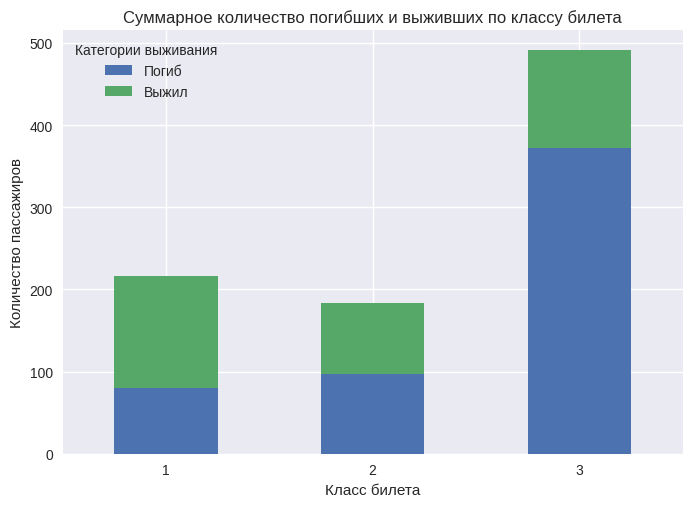

In [17]:
summary = traindf.groupby(['Pclass', 'Survived']).size().unstack()

summary.plot(kind='bar', stacked=True)
plt.title('Суммарное количество погибших и выживших по классу билета')
plt.xlabel('Класс билета')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)
plt.legend(title='Категории выживания', labels=['Погиб', 'Выжил'])
plt.show()

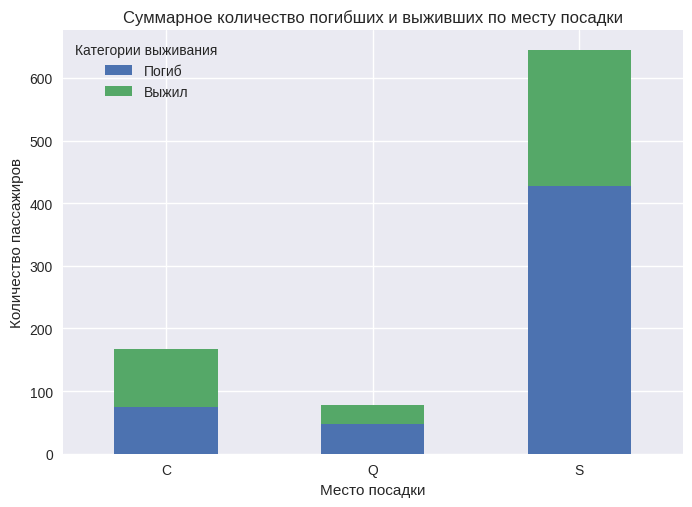

In [18]:
summary = traindf.groupby(['Embarked', 'Survived']).size().unstack()

summary.plot(kind='bar', stacked=True)
plt.title('Суммарное количество погибших и выживших по месту посадки')
plt.xlabel('Место посадки')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)
plt.legend(title='Категории выживания', labels=['Погиб', 'Выжил'])
plt.show()

In [19]:
traindf.groupby('Age').size().reset_index()

,Age,0
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
...,...,...
83,70.00,2
84,70.50,1
85,71.00,2
86,74.00,1


In [20]:
traindf.groupby('Fare').size().reset_index()

,Fare,0
0,0.0000,15
1,4.0125,1
2,5.0000,1
3,6.2375,1
4,6.4375,1
...,...,...
243,227.5250,4
244,247.5208,2
245,262.3750,2
246,263.0000,4


In [21]:
traindf.groupby('Embarked').size().reset_index()

,Embarked,0
0,C,168
1,Q,77
2,S,644


Работа с пропусками

In [22]:
traindf_edit = traindf
traindf_edit['Embarked'].fillna('S', inplace=True)

In [38]:
traindf_edit[traindf_edit['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName
179,180,0,3,"Leonard, Mr. Lionel",male,35.0,0,0,LINE,0.0,NaN,S,Mr
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,NaN,S,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,15.0,0,0,LINE,0.0,NaN,S,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,NaN,S,Mr
466,467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,NaN,S,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,NaN,S,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,45.0,0,0,LINE,0.0,NaN,S,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,30.0,0,0,112052,0.0,NaN,S,Mr


In [23]:
traindf_edit.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,646


In [50]:
traindf_edit['Age'].value_counts()

,count
Age,
30.0,214
20.0,150
25.0,106
35.0,89
15.0,86
40.0,49
0.0,44
45.0,41
50.0,32


In [51]:
def extract_title(name):
    return name.split(',')[1].strip().split('.')[0]

traindf_edit['AgeName'] = traindf_edit['Name'].apply(extract_title)
traindf_edit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName
0,1,0,3,"Braund, Mr. Owen Harris",male,20.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,25.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [52]:
average_age = traindf_edit.groupby('AgeName')['Age'].mean()
average_age.head(17)

,Age
AgeName,
Capt,70.000000
Col,57.500000
Don,40.000000
Dr,39.285714
Jonkheer,35.000000
Lady,45.000000
Major,47.500000
Master,2.125000
Miss,19.862637


In [53]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return average_age[row['AgeName']]
    else:
        return row['Age']

traindf_edit['Age'] = traindf_edit.apply(fill_age, axis=1)

In [54]:
traindf_edit.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


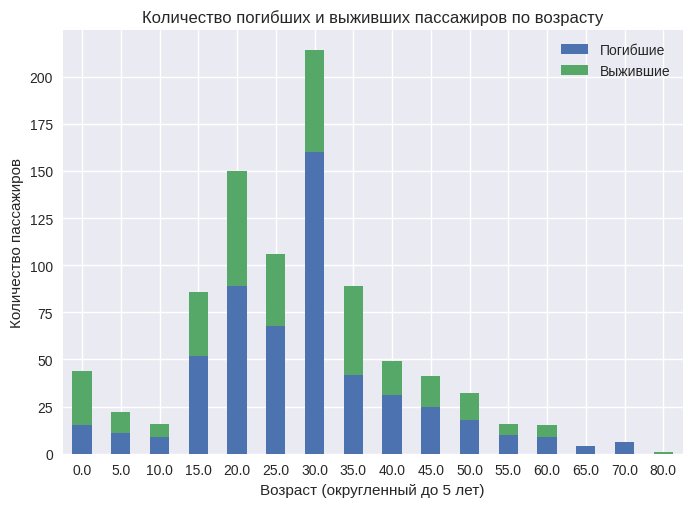

In [55]:
age_survival = traindf_edit
age_survival['Age'] = (traindf_edit['Age'] // 5) * 5
age_survival = age_survival.groupby(['Age', 'Survived']).size().unstack(fill_value=0)
age_survival.plot(kind='bar', stacked=True)
plt.title('Количество погибших и выживших пассажиров по возрасту')
plt.xlabel('Возраст (округленный до 5 лет)')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=0)
plt.legend(['Погибшие', 'Выжившие'])
plt.show()

In [56]:
traindf_edit.groupby(['Age', 'Fare']).size().reset_index(name='Count')

,Age,Fare,Count
0,0.0,8.5167,1
1,0.0,10.4625,1
2,0.0,11.1333,2
3,0.0,12.2875,1
4,0.0,13.4167,1
...,...,...,...
550,70.0,10.5000,1
551,70.0,34.6542,1
552,70.0,49.5042,1
553,70.0,71.0000,1


In [68]:
traindf_edit[traindf_edit['Age'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,21.0750,NaN,S,Master
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,0.0,1,1,PP 9549,16.7000,G6,S,Miss
16,17,0,3,"Rice, Master. Eugene",male,0.0,4,1,382652,29.1250,NaN,Q,Master
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,0.0,1,2,SC/Paris 2123,41.5792,NaN,C,Miss
63,64,0,3,"Skoog, Master. Harald",male,0.0,3,2,347088,27.9000,NaN,S,Master
65,66,1,3,"Moubarek, Master. Gerios",male,0.0,1,1,2661,15.2458,NaN,C,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.0,0,2,248738,29.0000,NaN,S,Master
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,0.0,4,2,347082,31.2750,NaN,S,Miss
159,160,0,3,"Sage, Master. Thomas Henry",male,0.0,8,2,CA. 2343,69.5500,NaN,S,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,0.0,4,1,3101295,39.6875,NaN,S,Master


In [69]:
traindf_edit = traindf_edit[(traindf_edit['Age'] != 0) & (traindf_edit['Fare'] != 0)]

In [71]:
traindf_edit.corr(numeric_only=True ,method = 'spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.010265,-0.019631,0.032385,-0.044450,0.023371,0.003573
Survived,-0.010265,1.000000,-0.366723,-0.015949,0.079053,0.097209,0.322314
Pclass,-0.019631,-0.366723,1.000000,-0.324413,-0.082416,-0.060794,-0.747079
Age,0.032385,-0.015949,-0.324413,1.000000,-0.081490,-0.118435,0.185430
SibSp,-0.044450,0.079053,-0.082416,-0.081490,1.000000,0.398244,0.431246
Parch,0.023371,0.097209,-0.060794,-0.118435,0.398244,1.000000,0.391879
Fare,0.003573,0.322314,-0.747079,0.185430,0.431246,0.391879,1.000000


In [72]:
traindf_edit.corr(numeric_only=True, method='kendall')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.008386,-0.015633,0.023023,-0.035483,0.018446,0.003392
Survived,-0.008386,1.000000,-0.349379,-0.013859,0.076849,0.094497,0.265212
Pclass,-0.015633,-0.349379,1.000000,-0.268436,-0.076504,-0.056312,-0.625747
Age,0.023023,-0.013859,-0.268436,1.000000,-0.067420,-0.099488,0.133229
SibSp,-0.035483,0.076849,-0.076504,-0.067420,1.000000,0.378901,0.346493
Parch,0.018446,0.094497,-0.056312,-0.099488,0.378901,1.000000,0.314609
Fare,0.003392,0.265212,-0.625747,0.133229,0.346493,0.314609,1.000000


In [73]:
traindf_edit.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.009605,-0.021504,0.026723,-0.030950,0.015602,0.021200
Survived,-0.009605,1.000000,-0.367514,-0.025774,-0.025206,0.050161,0.269249
Pclass,-0.021504,-0.367514,1.000000,-0.351599,0.043705,-0.002043,-0.561190
Age,0.026723,-0.025774,-0.351599,1.000000,-0.178854,-0.084154,0.108846
SibSp,-0.030950,-0.025206,0.043705,-0.178854,1.000000,0.386799,0.167999
Parch,0.015602,0.050161,-0.002043,-0.084154,0.386799,1.000000,0.216524
Fare,0.021200,0.269249,-0.561190,0.108846,0.167999,0.216524,1.000000


In [74]:
testdf_edit = testdf
testdf_edit['Fare'].mean()

35.627188489208635

In [75]:
testdf_edit.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [76]:
testdf_edit['Fare'].fillna(testdf_edit['Fare'].mean(), inplace=True)

In [77]:
testdf_edit['AgeName'] = testdf_edit['Name'].apply(extract_title)
testdf_edit.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [78]:
average_age_testdf = testdf_edit.groupby('AgeName')['Age'].mean()
average_age_testdf.head(17)

,Age
AgeName,
Col,50.000000
Dona,39.000000
Dr,53.000000
Master,7.406471
Miss,21.774844
Mr,32.000000
Mrs,38.903226
Ms,NaN
Rev,35.500000


In [79]:
def fill_age_testdf(row):
    if pd.isnull(row['Age']):
        return average_age_testdf[row['AgeName']]
    else:
        return row['Age']

testdf_edit['Age'] = testdf_edit.apply(fill_age_testdf, axis=1)

In [80]:
testdf_edit.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,1
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [81]:
testdf_edit[testdf_edit['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms


In [82]:
testdf_edit['AgeName'].value_counts()

,count
AgeName,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [83]:
testdf_edit['Age'] = testdf_edit['Age'].fillna(28)

In [84]:
testdf_edit[testdf_edit['Age'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName


In [85]:
testdf_edit[testdf_edit['Fare'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,32.0,0,0,112051,0.0,NaN,S,Mr
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Mr


In [98]:
testdf_edit['Fare'] = testdf_edit['Fare'].replace(0, testdf_edit.loc[testdf_edit['Age'] == 32, 'Fare'].mean())

Обучение модели

In [100]:
traindf_edit.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [101]:
y = traindf_edit["Survived"]

features = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
X = pd.get_dummies(traindf_edit[features])
X_test = pd.get_dummies(traindf_edit[features])

models = RandomForestClassifier (
    n_estimators=500,
    max_depth=6,
    min_samples_leaf=10,
    random_state=42)

In [102]:
models.fit(X, y)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_estimators=500,
                       random_state=42)

In [103]:
predictions = models.predict(X_test)

In [104]:
output = pd.DataFrame({'PassengerId': traindf_edit.PassengerId, 'Survived': predictions})

traindf_edit["Predictions"] = pd.DataFrame({'Survived': predictions})

In [105]:
traindf_edit.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName,Predictions
0,1,0,3,"Braund, Mr. Owen Harris",male,20.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35.0,1,0,PC 17599,71.2833,C85,C,Mrs,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,25.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0.0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,Mr,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,50.0,0,0,17463,51.8625,E46,S,Mr,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,25.0,0,2,347742,11.1333,NaN,S,Mrs,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,10.0,1,0,237736,30.0708,NaN,C,Mrs,1.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,55.0,0,0,113783,26.5500,C103,S,Miss,0.0


In [106]:
X_test_pred = models.predict(X_test)

print(accuracy_score(y, X_test_pred))

0.8341346153846154


Проверка модели на тестовых данных

In [107]:
testdf_edit.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [108]:
y_test = pd.get_dummies(testdf_edit[features])

predictions = models.predict(y_test)

outputtestdf = pd.DataFrame({'PassengerId': testdf_edit.PassengerId, 'Survived': predictions})
testdf_edit["Predictions"] = pd.DataFrame({'Survived': predictions})

outputtestdf.to_csv('submission.csv', index=False)

testdf_edit.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeName,Predictions
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,Mrs,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S,Mr,0
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,NaN,Q,Miss,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,NaN,S,Mr,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,NaN,C,Mrs,1
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,NaN,S,Mr,0


Аккуратность данных предсказаний при проверке на kaggle = 0.77751

Из этого следует что модель имеет переобучение